In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [78]:
# 0-6638?

#standard
# dataR1 = pd.read_csv('GBE_Stan_MLE_Rutledge_ET_S1.csv')
# dataR2 = pd.read_csv('GBE_Stan_MLE_Rutledge_ET_S2.csv')
# dataR3 = pd.read_csv('GBE_Stan_MLE_Rutledge_ET_S3.csv')
# dataR4 = pd.read_csv('GBE_Stan_MLE_Rutledge_ET_S4.csv')
# dataR5 = pd.read_csv('GBE_Stan_MLE_Rutledge_ET_S5.csv')
# dataR6 = pd.read_csv('GBE_Stan_MLE_Rutledge_ET_S6.csv')


# dataR = pd.concat([dataR1, dataR2, dataR3, dataR4, dataR5, dataR6])

#free variance
dataR1 = pd.read_csv('RF/GBE_Stan_MLE_Rutledge_ET_Free1.csv')
dataR2 = pd.read_csv('RF/GBE_Stan_MLE_Rutledge_ET_Free2.csv')
dataR3 = pd.read_csv('RF/GBE_Stan_MLE_Rutledge_ET_Free3.csv')
dataR4 = pd.read_csv('RF/GBE_Stan_MLE_Rutledge_ET_Free4.csv')
dataR = pd.concat([dataR1, dataR2, dataR3, dataR4])

#test case
# dataR = pd.read_csv('GBE_Stan_MLE_Rutledge_ET_TEST.csv')

#max 2 trials ago for forgetting factor
# dataR1 = pd.read_csv('RV2/GBE_Stan_MLE_Rutledge_ET_V2S1.csv')
# dataR2 = pd.read_csv('RV2/GBE_Stan_MLE_Rutledge_ET_V2S2.csv')
# dataR3 = pd.read_csv('RV2/GBE_Stan_MLE_Rutledge_ET_V2S3.csv')
# dataR4 = pd.read_csv('RV2/GBE_Stan_MLE_Rutledge_ET_V2S4.csv')
# dataR5 = pd.read_csv('RV2/GBE_Stan_MLE_Rutledge_ET_V2S5.csv')


# dataR = pd.concat([dataR1, dataR2, dataR3, dataR4, dataR5])

dataR = dataR.reset_index()

dataR

,index,N,CR,EV,PE,H,id,PE_forgetting,CR_coefficient,EV_coefficient,PE_coefficient,base,noise,log_lik
0,0,1,[ 0. 45. 0. -35. -55. 0. 0. 0. 55. ...,[-110. 0. 66. 0. 0. 22. 5...,[-110. 0. 66. 0. 0. 33. -5...,[ 70. -1. 82. -1. -1. 78. -1. -1. 71. ...,1,0.397765,-0.090650,0.029970,0.558435,62.0838,12.856100,-44.43470
1,1,1,[ 0. -30. 0. 45. -55. -35. 0. 0. 0. ...,[ -3. 0. 32. 0. 0. 0. -56.5 47...,[ 58. 0. 32. 0. 0. 0. 56.5 -47...,[100. -1. 100. -1. -1. 73. -1. -1. 66. ...,2,0.649892,-0.032244,0.009121,0.120246,73.3935,7.834470,-37.91370
2,2,1,[ 0. 35. -30. 0. 0. 55. 0. -45. 0. ...,[ 0. 0. 0. -7. -62. 0. -32.5 0...,[ 40. 0. 0. 47. -62. 0. -32.5 0...,[74. -1. 50. -1. -1. 50. -1. -1. 39. -1. 56. -...,3,0.696769,0.079336,0.126112,0.212315,55.4945,7.539330,-37.45930
3,3,1,[ 0. 45. 0. -45. 0. -55. 0. 45. 0. ...,[-25.5 0. 28. 0. 58.5 0. 61. 0...,[-25.5 0. 28. 0. -58.5 0. -61. 0...,[47. -1. 54. -1. -1. 46. -1. -1. 45. -1. 50. -...,4,0.671315,0.024114,-0.035377,0.058818,53.3765,3.186150,-27.92120
4,4,1,[ 0. 0. -45. -45. -35. 0. 0. -45. 0. ...,[ 24.5 -27.5 0. 0. 0. 54. 0. 0...,[ 24.5 -82.5 0. 0. 0. 54. 0. 0...,[72. -1. 38. -1. -1. 44. -1. -1. 50. -1. 50. -...,5,0.999989,0.206857,0.243509,0.177893,61.2212,7.025470,-36.64060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16332,1975,1,[ 35. 0. 0. 0. 30. 0. 0. 0. 0. ...,[ 0. -45. 36. 8.5 0. 13.5 -50. 36...,[ 0. 45. -36. -66.5 0. -41.5 -50. -36...,[67. -1. 64. -1. -1. 63. -1. -1. 61. -1. 61. -...,24532,0.766948,0.024388,0.007123,0.023124,63.6191,0.533225,-8.59547
16333,1976,1,[ 0. -35. 0. 0. 0. 55. 0. 0. 0. ...,[ 42.5 0. 15. -59. 28. 0. -46. 59...,[-42.5 0. 25. 59. -47. 0. 46. 59...,[100. -1. 100. -1. -1. 85. -1. -1. 40. ...,25501,0.388282,0.385689,0.176964,0.567827,62.0440,11.733700,-43.10160
16334,1977,1,[ 0. 0. 55. 0. 0. 45. 0. -35. 0. ...,[ 6. -46. 0. -16. 18. 0. 0. 0...,[-69. -46. 0. -56. -37. 0. 0. 0...,[77. -1. 74. -1. -1. 52. -1. -1. 66. -1. 40. -...,25678,0.307848,0.154567,-0.105843,0.256254,55.3274,7.297870,-37.07780
16335,1978,1,[ 35. -45. 55. 0. 0. 0. -55. -55. 0. ...,[ 0. 0. 0. 42.5 -59. -11.5 0. 0...,[ 0. 0. 0. -42.5 -59. 51.5 0. 0...,[54. -1. 49. -1. -1. 33. -1. -1. 53. -1. 29. -...,39085,0.913598,0.031803,0.040591,0.208170,42.8424,6.330820,-35.43900


In [79]:
params = ['PE_forgetting', 'CR_coefficient', 'EV_coefficient', 'PE_coefficient', 'base', 'log_lik']

print('Average Rutledge Weights')
for i in params:
    print( i + ' ' + str(np.median(dataR[i])))

Average Rutledge Weights
PE_forgetting 0.707333
CR_coefficient 0.0356237
EV_coefficient 0.0343905
PE_coefficient 0.0854904
base 55.2081
log_lik -31.766


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

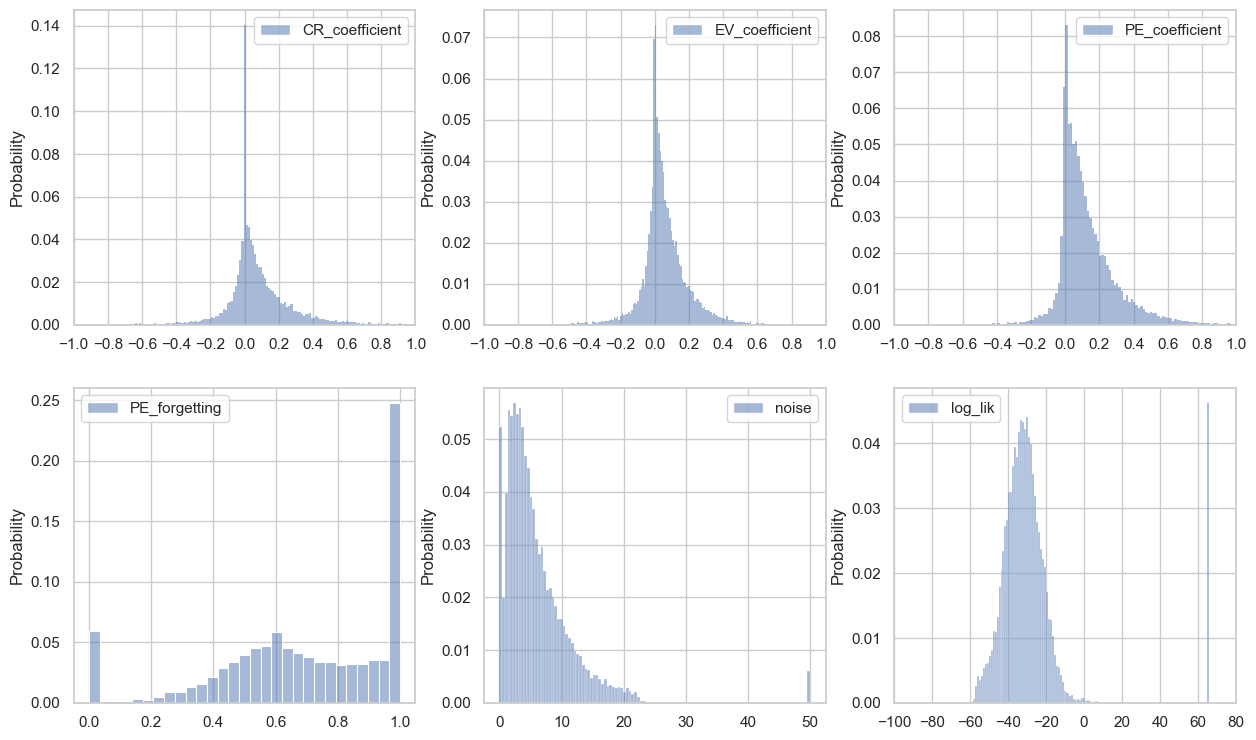

In [80]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
sns.histplot(dataR[['CR_coefficient']], stat='probability', ax=axs[0][0])
axs[0][0].set_xticks([0.2 * i for i in range(-5,6)])
axs[0][0].set_xlim(-1, 1)
sns.histplot(dataR[['EV_coefficient']], stat='probability', ax=axs[0][1])
axs[0][1].set_xticks([0.2 * i for i in range(-5,6)])
axs[0][1].set_xlim(-1, 1)
sns.histplot(dataR[['PE_coefficient']], stat='probability', ax=axs[0][2])
axs[0][2].set_xticks([0.2 * i for i in range(-5,6)])
axs[0][2].set_xlim(-1, 1)

sns.histplot(dataR[['PE_forgetting']], stat='probability', ax=axs[1][0])
sns.histplot(dataR[['noise']], stat='probability', ax=axs[1][1])
sns.histplot(dataR[['log_lik']], stat='probability', ax=axs[1][2])
axs[1][2].set_xticks([20 * i for i in range(-5,5)])
# axs[1][2].set_xlim(-100, 0)

In [81]:
# df = data.copy()
# df = df.reset_index()

# # from ast import literal_eval
# # df['CR'] = df['CR'].apply(literal_eval)

# # df

# for index, row in df.iterrows():
#     valid = False
#     CR = row['CR']
#     CR = CR[1:-1]
#     CR = np.fromstring(CR, sep=' ')
#     EV = row['EV']
#     EV = EV[1:-1]
#     EV = np.fromstring(EV, sep=' ')

#     for i in CR:
#         if i != 0:
#             valid = True
#             break
#     if not valid:
#         df = df.drop([index])
#     valid = False
#     for i in EV:
#         if i != 0:
#             valid = True
#             break
#     if not valid:
#         df = df.drop([index])
    
# df

In [82]:
dataLA1 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_STANDARD0.csv')
dataLA2 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_STANDARD.csv')
dataLA3 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_STANDARD2.csv')
dataLA = pd.concat([dataLA1, dataLA2, dataLA3])
dataLA = dataLA.reset_index()
dataLA.head()

# dataLA = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_CUBIC.csv')

# dataLA1 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_SINDY01.csv')

# dataLA2 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_SINDY02.csv')

# dataLA3 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_SINDY03.csv')

# dataLA4 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_SINDY04.csv')

# dataLA5 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_SINDY05.csv')



# dataLA1 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_PERTURB1.csv')

# dataLA2 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_PERTURB2.csv')

# dataLA3 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_PERTURB3.csv')

# dataLA4 = pd.read_csv('GBE_Stan_MLE_Rutledge_LA_ET_PERTURB4.csv')


# dataLA = pd.concat([dataLA1, dataLA2, dataLA3, dataLA4])
# dataLA = dataLA.reset_index()


dataLA


,index,N,CR,EV,PE,H,id,PE_forgetting,CR_coefficient,EV_coefficient,PE_coefficient,mu,beta,noise,log_lik
0,0,1,[ 0. 45. 0. -35. -55. 0. 0. 0. 55. ...,[-110. 0. 66. 0. 0. 22. 5...,[-110. 0. 66. 0. 0. 33. -5...,[ 70. -1. 82. -1. -1. 78. -1. -1. 71. ...,1,0.999994,-0.310463,-0.719422,-0.088700,62.7270,0.715490,5.19226,-44.9611
1,1,1,[ 0. -30. 0. 45. -55. -35. 0. 0. 0. ...,[ -3. 0. 32. 0. 0. 0. -56.5 47...,[ 58. 0. 32. 0. 0. 0. 56.5 -47...,[100. -1. 100. -1. -1. 73. -1. -1. 66. ...,2,0.687577,-0.002651,0.039613,0.119745,70.6465,0.916122,3.77238,-35.9486
2,2,1,[ 0. 35. -30. 0. 0. 55. 0. -45. 0. ...,[ 0. 0. 0. -7. -62. 0. -32.5 0...,[ 40. 0. 0. 47. -62. 0. -32.5 0...,[74. -1. 50. -1. -1. 50. -1. -1. 39. -1. 56. -...,3,0.999339,0.055812,0.078045,0.170472,53.2520,2.215020,5.37345,-36.2219
3,3,1,[ 0. 45. 0. -45. 0. -55. 0. 45. 0. ...,[-25.5 0. 28. 0. 58.5 0. 61. 0...,[-25.5 0. 28. 0. -58.5 0. -61. 0...,[47. -1. 54. -1. -1. 46. -1. -1. 45. -1. 50. -...,4,0.536386,0.045641,-0.045847,0.083613,53.0870,1.308020,3.19411,-29.3841
4,4,1,[ 0. 0. -45. -45. -35. 0. 0. -45. 0. ...,[ 24.5 -27.5 0. 0. 0. 54. 0. 0...,[ 24.5 -82.5 0. 0. 0. 54. 0. 0...,[72. -1. 38. -1. -1. 44. -1. -1. 50. -1. 50. -...,5,0.602735,0.592840,0.640788,0.243247,28.5029,0.560837,3.65776,-38.2335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16332,6199,1,[ 35. 0. 0. 0. 30. 0. 0. 0. 0. ...,[ 0. -45. 36. 8.5 0. 13.5 -50. 36...,[ 0. 45. -36. -66.5 0. -41.5 -50. -36...,[67. -1. 64. -1. -1. 63. -1. -1. 61. -1. 61. -...,24532,0.717545,0.033552,0.005865,0.027276,63.2877,1.619310,1.49027,-10.6931
16333,6200,1,[ 0. -35. 0. 0. 0. 55. 0. 0. 0. ...,[ 42.5 0. 15. -59. 28. 0. -46. 59...,[-42.5 0. 25. 59. -47. 0. 46. 59...,[100. -1. 100. -1. -1. 85. -1. -1. 40. ...,25501,0.436251,0.364307,0.234894,0.628400,62.3079,1.869860,6.66523,-43.2601
16334,6201,1,[ 0. 0. 55. 0. 0. 45. 0. -35. 0. ...,[ 6. -46. 0. -16. 18. 0. 0. 0...,[-69. -46. 0. -56. -37. 0. 0. 0...,[77. -1. 74. -1. -1. 52. -1. -1. 66. -1. 40. -...,25678,0.299531,0.145597,-0.133588,0.342962,55.5679,1.384550,4.48564,-36.5673
16335,6202,1,[ 35. -45. 55. 0. 0. 0. -55. -55. 0. ...,[ 0. 0. 0. 42.5 -59. -11.5 0. 0...,[ 0. 0. 0. -42.5 -59. 51.5 0. 0...,[54. -1. 49. -1. -1. 33. -1. -1. 53. -1. 29. -...,39085,0.490284,0.293984,0.262812,0.610908,31.2695,0.666751,3.52811,-36.4901


In [83]:
params = ['PE_forgetting', 'CR_coefficient', 'EV_coefficient', 'PE_coefficient', 'mu', 'beta', 'noise', 'log_lik']

print('Average Linear Attraction Weights')
for i in params:
    print( i + ' ' + str(np.median(dataLA[i])))

Average Linear Attraction Weights
PE_forgetting 0.565864
CR_coefficient 0.0539324
EV_coefficient 0.0562123
PE_coefficient 0.146124
mu 54.1248
beta 1.30064
noise 3.5787
log_lik -31.9912


In [84]:
list1 = np.array(dataR['log_lik'])
list2 = np.array(dataLA['log_lik'])

# for i, j in enumerate(list1):
#     if (j < -100):
#         list1[i]=-100

# for i, j in enumerate(list2):
#     if (j < -100):
#         list2[i]=-100

BIC_R = -2*np.sum(list1) + 6*np.log(16337*11)
BIC_LA = -2*np.sum(list2) + 7*np.log(16337*11)

print('Rutledge Total Scaled BIC: ', BIC_R/100000)
print('Rutledge/LA Total Scaled BIC: ', BIC_LA/100000)

BIC_R2 = []
for i in list1:
   BIC_R2.append(-2*i + 6*np.log(11))
BIC_LA2 = []
for j in list2:
   BIC_LA2.append(-2*j + 7*np.log(11))

print('Rutledge Avg BIC: ', np.mean(BIC_R2))
print('Rutledge/LA Avg BIC: ', np.mean(BIC_LA2))

print('Rutledge Median BIC: ', np.median(BIC_R2))
print('Rutledge/LA Median BIC: ', np.median(BIC_LA2))

Rutledge Total Scaled BIC:  9.07789971259755
Rutledge/LA Total Scaled BIC:  8.062190148009808
Rutledge Avg BIC:  69.94943179236346
Rutledge/LA Avg BIC:  66.12935218961552
Rutledge Median BIC:  77.91937163679022
Rutledge/LA Median BIC:  80.7676669095886


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Axes: ylabel='Probability'>

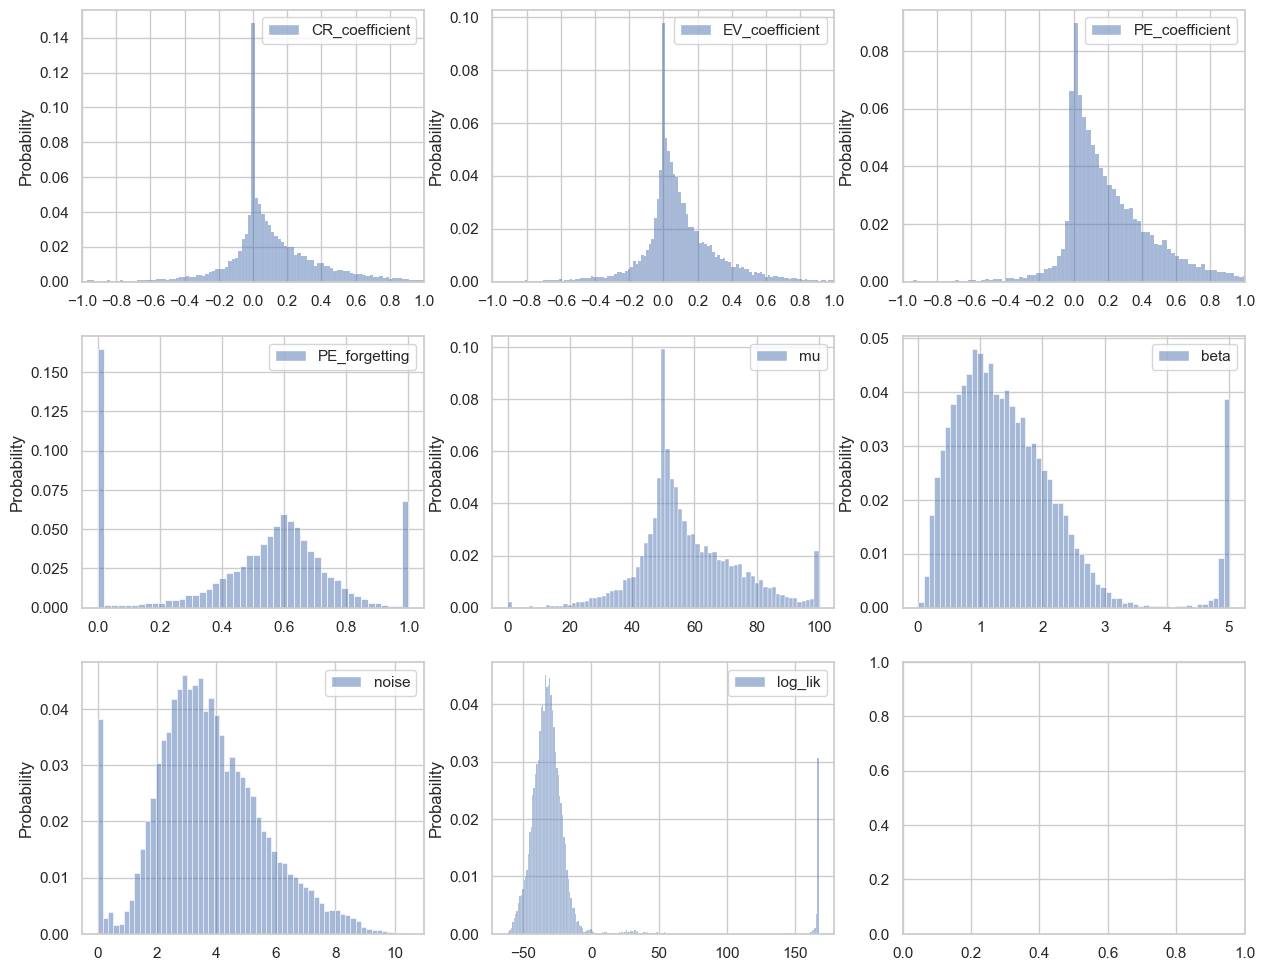

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
sns.histplot(dataLA[['CR_coefficient']], stat='probability', ax=axs[0][0])
axs[0][0].set_xticks([0.2 * i for i in range(-5,6)])
axs[0][0].set_xlim(-1, 1)
sns.histplot(dataLA[['EV_coefficient']], stat='probability', ax=axs[0][1])
axs[0][1].set_xticks([0.2 * i for i in range(-5,6)])
axs[0][1].set_xlim(-1, 1)
sns.histplot(dataLA[['PE_coefficient']], stat='probability', ax=axs[0][2])
axs[0][2].set_xticks([0.2 * i for i in range(-5,6)])
axs[0][2].set_xlim(-1, 1)

sns.histplot(dataLA[['PE_forgetting']], stat='probability', ax=axs[1][0])
sns.histplot(dataLA[['mu']], stat='probability', ax=axs[1][1])

array = dataLA[dataLA['beta']<0.1]['beta']
sns.histplot(dataLA[['beta']], stat='probability', ax=axs[1][2])
# axs[1][2].set_xticks([0.2 * i for i in range(-5,6)])
# axs[1][2].set_xlim(0, 0.1)


sns.histplot(dataLA[['noise']], stat='probability', ax=axs[2][0])
sns.histplot(dataLA[['log_lik']], stat='probability', ax=axs[2][1])
# axs[2][1].set_xticks([0.2 * i for i in range(-5,6)])
# axs[2][1].set_xlim(-100, 0)


(-60.0, 0.0)

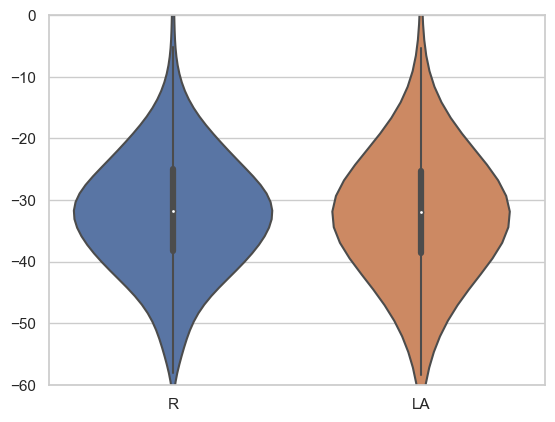

In [86]:
sns.set(style = 'whitegrid')  
list1 = ['R' for i in range(0, 16337)]
list2 = ['LA' for i in range(0, 16337)]
X = np.concatenate([list1, list2])
Y = np.concatenate([dataR['log_lik'], dataLA['log_lik']])
  
sns.violinplot(x = X, y = Y)
plt.ylim(-60, 0)

In [87]:
print('Shapiro-Wilk R:', stat.shapiro(dataR['log_lik']))
print('Shapiro-Wilk LA:', stat.shapiro(dataLA['log_lik']))
print(len(dataLA['log_lik']))
print('Paired T-Test', stat.ttest_rel(dataR['log_lik'], dataLA['log_lik']))

Shapiro-Wilk R: ShapiroResult(statistic=0.6077184677124023, pvalue=0.0)
Shapiro-Wilk LA: ShapiroResult(statistic=0.4208534359931946, pvalue=0.0)
16337
Paired T-Test TtestResult(statistic=-20.239086770282338, pvalue=5.609848226088479e-90, df=16336)


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


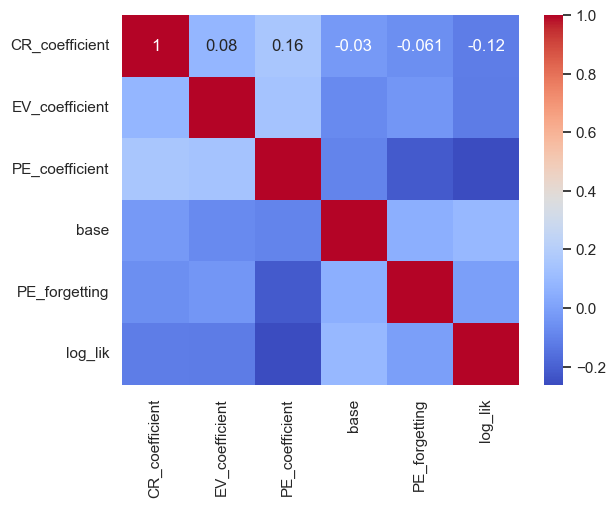

In [88]:
corr_matrix = dataR[['CR_coefficient', 'EV_coefficient', 'PE_coefficient', 'base', 'PE_forgetting','log_lik']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

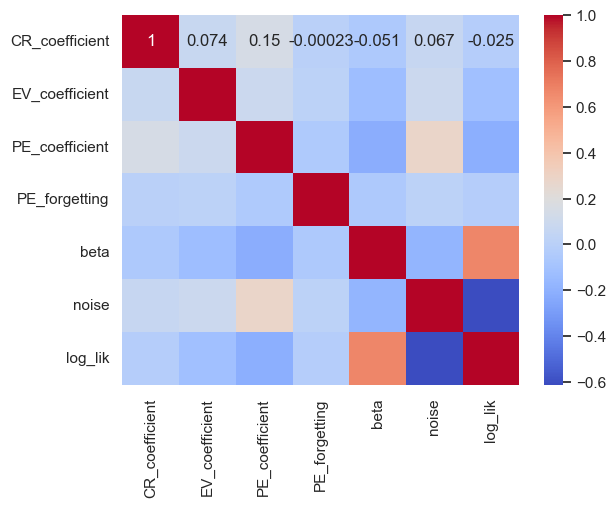

In [89]:
corr_matrix = dataLA[['CR_coefficient', 'EV_coefficient', 'PE_coefficient', 'PE_forgetting', 'beta', 'noise', 'log_lik']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

[ 70.  -1.  82.  -1.  -1.  78.  -1.  -1.  71.  -1.  50.  -1.  -1.  23.
  -1.  -1.  50.  -1.  -1.  50.  -1.  27.  -1.  -1.  50.  -1.  -1. 100.
  -1. 100.]
0.397765
0.999994


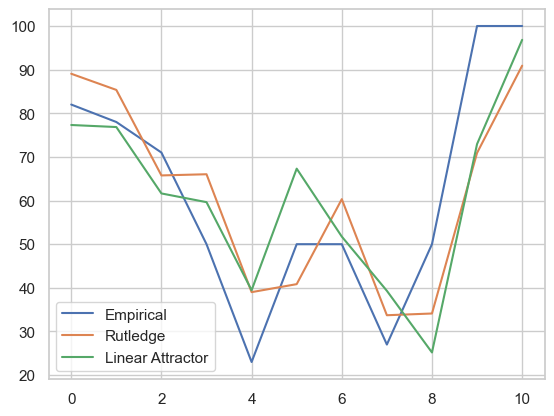

In [90]:
p = 0

H = dataLA['H'][p]
print(H)
H = H[1:-1]
H = np.fromstring(H, sep=' ')
time = [i for i in range(0, 11)]

CR = dataLA['CR'][p]
CR = CR[1:-1]
CR = np.fromstring(CR, sep=' ')
# print(CR)
wCR = []

EV = dataLA['EV'][p]
EV = EV[1:-1]
EV = np.fromstring(EV, sep=' ')
wEV = []

PE = dataLA['PE'][p]
PE = PE[1:-1]
PE = np.fromstring(PE, sep=' ')
wPE = []

forget = dataR['PE_forgetting'][p]

print(forget)

for i in range(0, 30):
    CR_sum = 0
    EV_sum = 0
    PE_sum = 0
    for j in range(0, i+1):
        CR_sum += CR[i-j] * pow(forget, j)
        EV_sum += EV[i-j] * pow(forget, j)
        PE_sum += PE[i-j] * pow(forget, j)
    wCR.append(CR_sum)
    wEV.append(EV_sum)
    wPE.append(PE_sum)

data = {'H':H, 'wCR':wCR, 'wEV':wEV, 'wPE':wPE}
df = pd.DataFrame(data)
df = df[df['H']>-1].reset_index()
H_out = []


for k in range(1, len(df)):
    H_out.append(dataR['CR_coefficient'][p]*df['wCR'][k]+dataR['EV_coefficient'][p]*df['wEV'][k]+dataR['PE_coefficient'][p]*df['wPE'][k]+dataR['base'][p])

forget2 = dataLA['PE_forgetting'][p]
wCR2 = []
wEV2 = []
wPE2 = []

print(forget2)

for i in range(0, 30):
    CR_sum = 0
    EV_sum = 0
    PE_sum = 0
    for j in range(0, i+1):
        if(j < 3):
            CR_sum += CR[i-j] * pow(forget2, j)
            EV_sum += EV[i-j] * pow(forget2, j)
            PE_sum += PE[i-j] * pow(forget2, j)
    wCR2.append(CR_sum)
    wEV2.append(EV_sum)
    wPE2.append(PE_sum)

data2 = {'H':H, 'wCR':wCR2, 'wEV':wEV2, 'wPE':wPE2}
df2 = pd.DataFrame(data2)
df2 = df2[df2['H']>-1].reset_index()
H_out2 = []


for k in range(1, len(df2)):
    adjusted_mu = dataLA['mu'][p] + dataLA['CR_coefficient'][p]*df2['wCR'][k]+dataLA['EV_coefficient'][p]*df2['wEV'][k]+dataLA['PE_coefficient'][p]*df2['wPE'][k]
    H_out2.append((df2['H'][k-1]-adjusted_mu) * np.exp(-1*dataLA['beta'][p]) + adjusted_mu) 

plt.plot(time, df['H'][1:])
plt.plot(time, H_out)
plt.plot(time, H_out2)

plt.legend(['Empirical', 'Rutledge', 'Linear Attractor'])
